# computing

In [15]:
from heatMD_util import *
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# omp_num_threads = 8

In [ ]:
traj_path = '/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD'
def traj2csv(traj_p,case):
    trajs_path = os.path.join(traj_p,case,'job*/VHH*')
    trajs = sorted(glob.glob(trajs_path))
    print(trajs)
    df_Q = pd.DataFrame()
    # df_hydrophobicSASA = pd.DataFrame()
    for i in trajs:
        if os.path.exists(os.path.join(i,'traj_0.pdb')):
            pdb = os.path.join(i,'traj_0.pdb')
            dcd = os.path.join(i,'traj.dcd')
            t = md.load(dcd,top=pdb)#[0:900]
            print(i+' load done\n')
            print(t)
            print('cal Q')
            base_name = os.path.basename(i)
            df_Q[base_name]=best_hummer_q_hydrophilic_All(t,t[0])
            print('Q done')
            # print('cal SASA')
            # df_hydrophobicSASA[i] = get_hydrophobic_SASA(t)

    df_Q.to_csv('Q_'+case+'.csv')
    # df_hydrophobicSASA.to_csv('hydrophobic_SASA_'+case+'.csv')

cases = sorted([i for i in os.listdir(traj_path) if 'rep' in i])
print(cases)
# for j in cases:
#     print(j)
#     traj2csv(traj_path,j)
Parallel(n_jobs=10)(delayed(traj2csv)(traj_path,i) for i in cases)

# ploting

      VHH-1     VHH-2     VHH-3     VHH-4     VHH-5     VHH-6     VHH-7  \
0  0.925616  0.888893  0.915558  0.830441  0.936531  0.833020  0.958969   
0  0.922736  0.918267  0.883423  0.897355  0.933995  0.907582  0.915258   
0  0.945800  0.903811  0.941105  0.877948  0.890225  0.927698  0.923305   
0  0.871899  0.900978  0.865709  0.832163  0.920244  0.906307  0.879693   
0  0.945826  0.939678  0.945117  0.847046  0.906263  0.892498  0.867775   
0  0.885395  0.872494  0.916016  0.831736  0.930197  0.897499  0.882022   
0  0.918332  0.873817  0.958068  0.899228  0.900464  0.907370  0.913523   
0  0.924563  0.923941  0.884739  0.834930  0.849310  0.923007  0.793331   
0  0.949431  0.902899  0.913544  0.777743  0.866266  0.908115  0.824030   
0  0.886995  0.945846  0.909354  0.873145  0.946863  0.880932  0.849106   

      VHH-8  
0  0.929226  
0  0.945368  
0  0.954793  
0  0.925763  
0  0.929322  
0  0.899692  
0  0.956538  
0  0.916539  
0  0.919400  
0  0.908997  


Text(0, 0.5, 'cMD_Q_hydrophilic_All_avg')

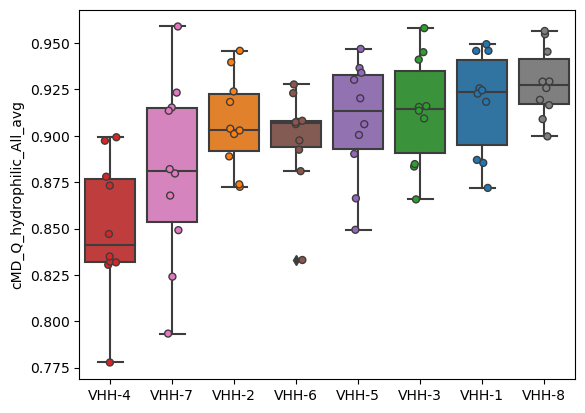

In [24]:
def get_mean(csv_f):
    df=pd.read_csv(csv_f)
    return df.iloc[:,1:].mean().to_frame().T
Q_l = sorted([ i for i in os.listdir('./') if 'Q_rep' in i])
df_Q_l = [get_mean(i) for i in Q_l]
new_df_Q = pd.concat(df_Q_l)
print(new_df_Q)
new_df_Q.median().T.to_csv('../cmd_q_polar_all_median.csv')
meds = new_df_Q.median().sort_values()
new_df_Q = new_df_Q[meds.index]
# new_df_Q.boxplot()
columns_names=['VHH-'+str(i) for i in range(1,9)]
color_names=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
c_map=dict(zip(columns_names,color_names))
ax = sns.boxplot(data=new_df_Q,palette=c_map)
sns.stripplot(data=new_df_Q, ax=ax, linewidth=1,palette=c_map)
# plt.ylim(0.55,1)
plt.ylabel('cMD_Q_hydrophilic_All_avg')

In [5]:
Q_median = new_df_Q.median(axis=0).sort_values(ascending=False).to_frame().T
print(Q_median)
print('>'.join( Q_median.columns))

     VHH-8     VHH-1     VHH-6    VHH-2     VHH-5     VHH-3     VHH-7  \
0  0.82066  0.789391  0.783876  0.78125  0.767905  0.757921  0.744209   

      VHH-4  
0  0.737803  
VHH-8>VHH-1>VHH-6>VHH-2>VHH-5>VHH-3>VHH-7>VHH-4


# test code

In [5]:
print(sns.color_palette().as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [14]:
import glob,os.path
filesDepth3 = glob.glob('/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD/rep*/job*/VHH*')
filesDepth3 = filter(lambda f: 'VHH-1' in f, filesDepth3)
print([i for i in filesDepth3])


['/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD/rep0/job_190430_result/VHH-1', '/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD/rep1/job_190438_result/VHH-1', '/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD/rep2/job_190446_result/VHH-1', '/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD/rep3/job_190454_result/VHH-1', '/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD/rep4/job_190462_result/VHH-1', '/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD/rep5/job_190470_result/VHH-1', '/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD/rep6/job_190478_result/VHH-1', '/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD/rep7/job_190486_result/VHH-1', '/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD/rep8/job_190494_result/VHH-1', '/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD/rep9/job_190502_result/VHH-1']


In [5]:
print(os.path.join('/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD/rep*','job*/VHH*'))

/mnt/zhangpeng/100_nitrogen_MD/04_VHH_NVT_cMD/rep*/job*/VHH*


In [9]:
print()